# TEXT MINING PROJECT - NEWS CLASSIFICANTION

## Dataset provided = ag_news

#### Gabriele Di Gesù (4906309) 

*install all the packages needed before starting*


>pip install pandas

>pip install numpy

>pip install nltk

>pip install re

>pip install string

>pip install matplotlib

>pip install sklearn

>pip install sys

>pip install keras

4 Classifiers will be compared: Multinomial Naive Bayes, OneVsRest Classifier with Logistic Regression, Random Forest, Decision Trees

**Importing Libraries and importing csv file as pandas dataframe**

In [1]:
import re
import numpy as np 
import pandas as pd 

Importing datasets

In [2]:
ag_train = pd.read_csv('train.csv', header=None)
ag_test = pd.read_csv('test.csv', header=None)

In [3]:
ag_train.columns = ['Topic', 'Title', 'Article']
ag_test.columns = ['Topic', 'Title', 'Article']

In [32]:
ag_train.head()

,Topic,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


*Check the number of topics*

In [4]:
(set(ag_train['Topic']))

{1, 2, 3, 4}

In [8]:
print("There are {} articles and 4 Topic in this dataset.".format(ag_train.shape[0]))

There are 120000 articles and 4 Topic in this dataset.


In [35]:
ag_test.head()

,Topic,Title,Article
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [36]:
(set(ag_test['Topic']))

{1, 2, 3, 4}

In [9]:
print("There are {} observations articles and 4 Topic in this dataset.".format(ag_test.shape[0]))

There are 7600 observations articles and 4 Topic in this dataset.


*Since the original test dataset is too little, it's better to concatenate the datasets creating only one*

In [10]:
ag_news = pd.concat([ag_train, ag_test])
ag_news.head(10)

,Topic,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [14]:
print("There are {} observations (Articles) and 4 Topic in this dataset.".format(ag_news.shape[0]))

There are 127600 observations (Articles) and 4 Topic in this dataset.


*Since there are two column with text, to use all the data, concatenate them creating an 
additional column named 'text'*

In [5]:
# using headlines and short_description as input X

ag_news['text'] = ag_news.Title + " " + ag_news.Article

ag_news.head(5)

,Topic,Title,Article,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


*Visualzing dataset balance*

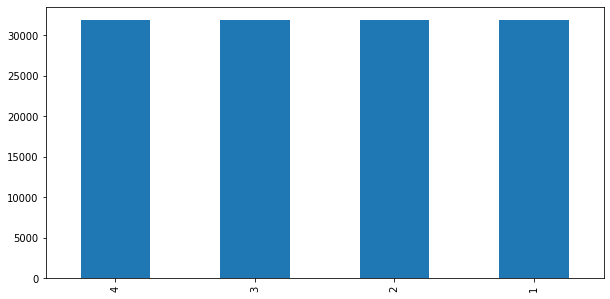

In [41]:
data = ag_news[["Topic", "Title"]]
data.Topic.value_counts().plot.bar(figsize = (10,5))

*This dataset is perfectly balanced, we would just look to the metric 'accuracy'*

**Visualizing the most common words in the dataset with wordcloud (avoiding stopwords)**

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

In [7]:
stopwords = nltk.corpus.stopwords.words("english")
stop_words = stopwords

In [44]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [45]:
def create_wordcloud(Topic):
    text = " ".join(desc for desc in ag_train[ag_train['Topic'] == Topic].Article)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'white', stopwords = stopwords).generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

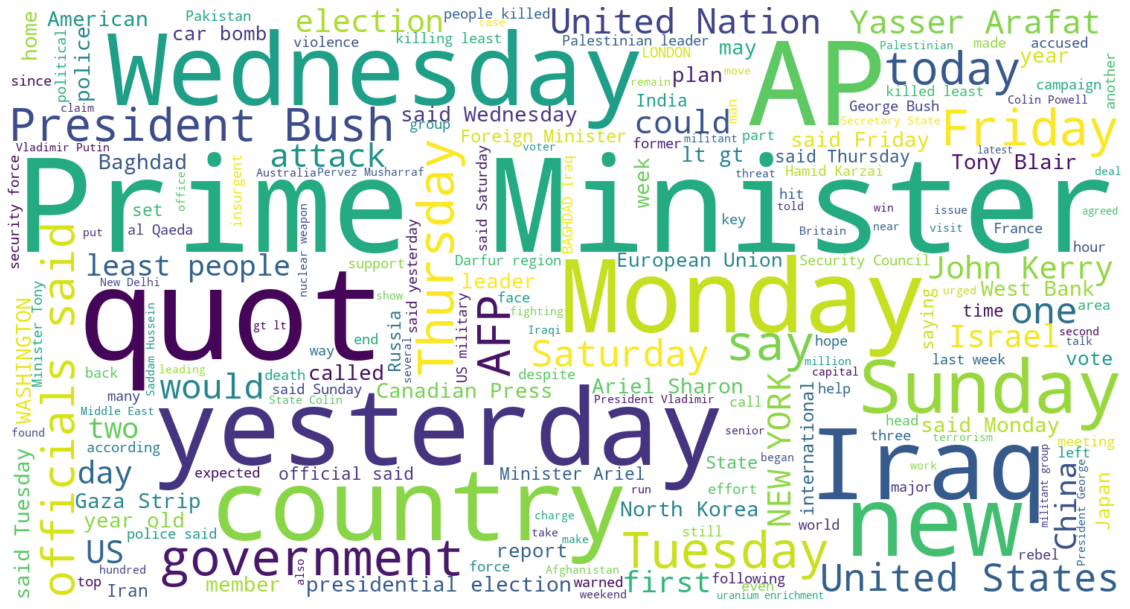

In [46]:
create_wordcloud(1)

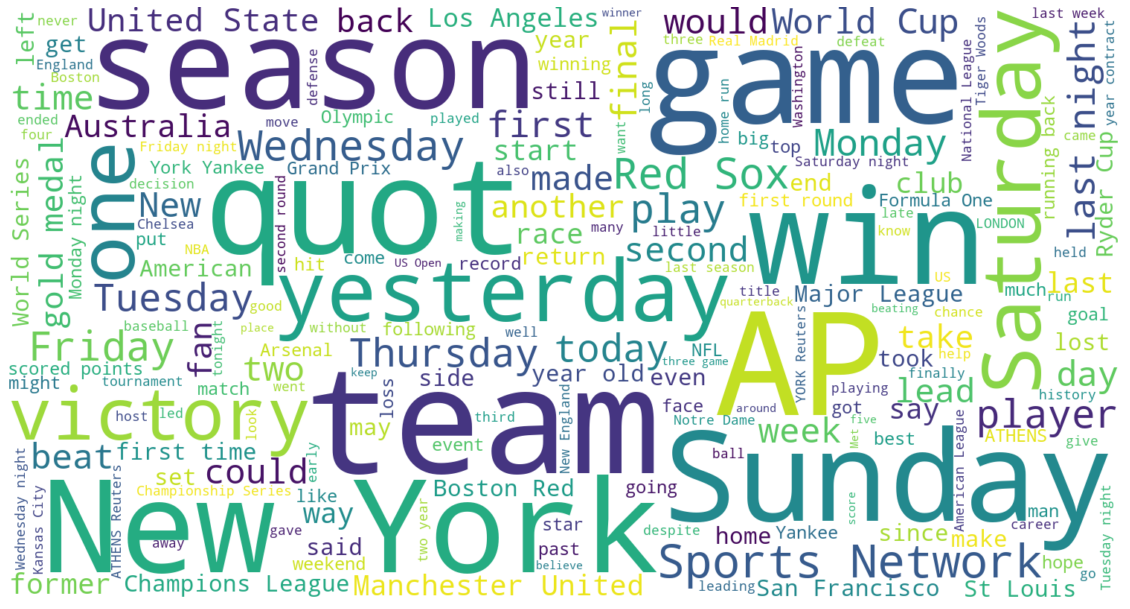

In [47]:
create_wordcloud(2)

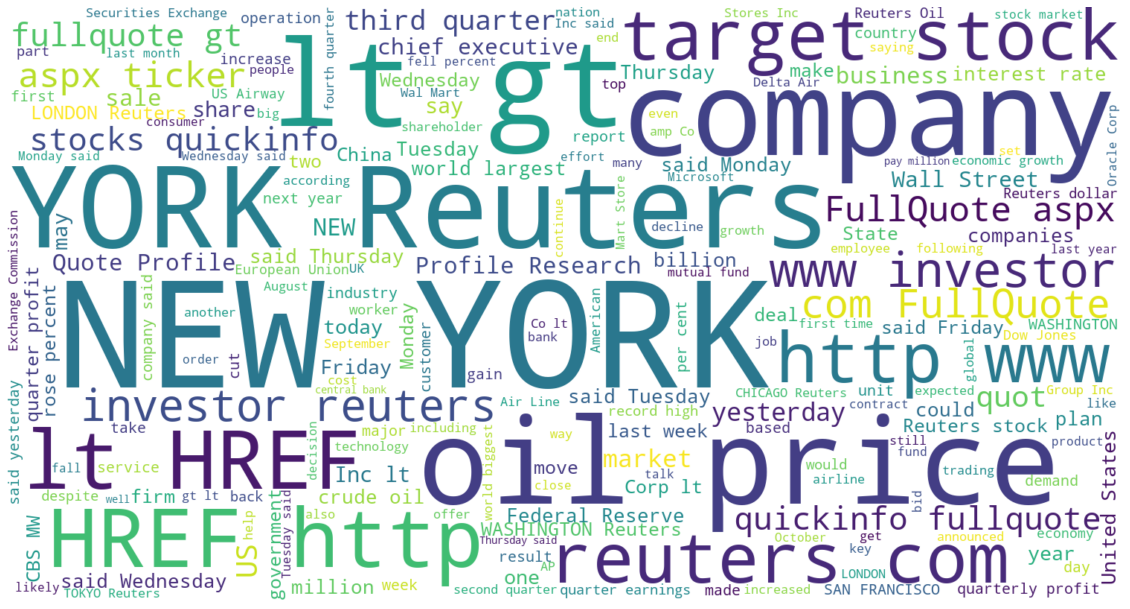

In [48]:
create_wordcloud(3)

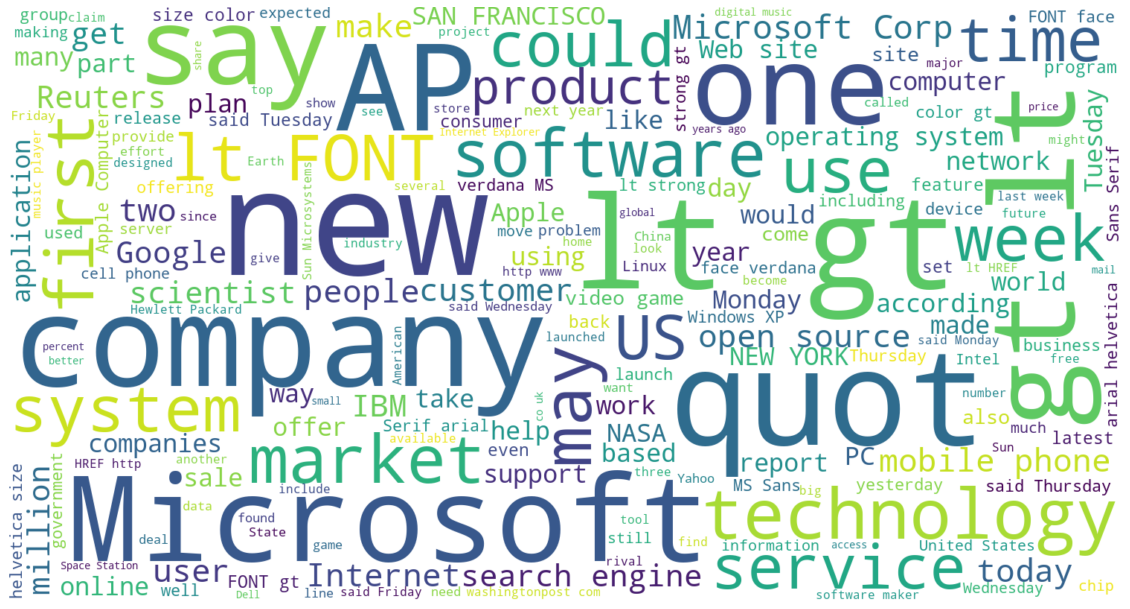

In [49]:
create_wordcloud(4)


**Clean up and stemming text**

STEMMING

'Snowball Stemmer' (Porter 2, M.Porter 2001): Martin Porter himself has admitted that this stemmer is an improvement of the original 'Porter Algorithm' for stemming. This is also slightly faster in computation that Porter Algo.



*the code after in the section '#Clean the text' was found on the web*

In [8]:
# Text Normalizing function

def clean_text(text):
    
    # Remove puncuation
    text = text.translate(string.punctuation)
    
    # Convert words to lower case and split them
    text = text.lower().split()
    
    # Remove stop words
    stops = stopwords
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [9]:
ag_news['text'] = ag_news['text'].map(lambda x: clean_text(x))

In [10]:
ag_news.head(10)

,Topic,Title,Article,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bear claw back black reuter reuter sho...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyl look toward commerci aerospac reuter re...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economi cloud stock outlook reuter reuter ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipelin reu...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar all - time record pose new mena...
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,stock end up near year low reuter reuter stock...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...,money fund fell latest week ap asset nation re...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...,fed minut show dissent inflat usatoday com usa...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...,safeti net forb com forb com earn ph d sociolo...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre...",wall st bear claw back black new york reuter s...


*Part of Speech Tagging and Synctatical parsing were purposely avoided in order to reduce computation time, due to the fact that in news classification, the function of a word in a sentence and the link among the words, are not too much important in determining the topic of an article*

**Split the ag_news dataset**

In [11]:
from sklearn.model_selection import train_test_split

X = ag_news['text']
y = ag_news['Topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**TOKENIZE, VECTORIZE, ENCODE**

*RegexpTokenizer splits strings into substrings, performning tokenization*

*TFIDF transformer, after the word counts performed by CountVecorizer, computes IDF (Inverse document Frequency) and tf-idf scores*

*LabelEncoder converts topic occurrences in model-understandable numerical data*

In [12]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer

tokenizer = RegexpTokenizer(r"\w+")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stopwords)
x_train_vec = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
x_train = tfidf_transformer.fit_transform(x_train_vec)

# convert topic occurrences in model-understandable numerical data
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

x_test = vectorizer.transform(X_test)
y_test = encoder.transform(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(89320, 41818)
(89320,)
(38280, 41818)
(38280,)


**Fitting different classifiers and benchmarking**

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

*Multinomial Naive Bayes*

Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of a feature. It calculate the probability of each tag for a given text and then output the tag with the highest one.
Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.
(ref : stat.stackexchange.com)

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
print("Accuracy: {}".format(nb.score(x_test, y_test)))

Accuracy: 0.9017502612330198


In [20]:
x_test_pred_nb = nb.predict(x_test)
print(classification_report(y_test, x_test_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9498
           1       0.95      0.97      0.96      9682
           2       0.86      0.88      0.87      9514
           3       0.89      0.86      0.88      9586

    accuracy                           0.90     38280
   macro avg       0.90      0.90      0.90     38280
weighted avg       0.90      0.90      0.90     38280



In [24]:
nb_acc = nb.score(x_test, y_test)
nb_acc

0.9017502612330198

*OneVsRest classifer, with logistic regression*

One-vs-rest classification is a method which involves training N distinct binary classifiers (in this case 4), each designed for recognizing a particular class.

Logistic Regression is one of the basic and popular algorithm to solve a classification problem. It is named as 'Logistic Regression', because it's underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function that is used in this method of classification.

(ref: towardsdatascience.com)

In [26]:
#NOT MANDATORY

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
#import warnings filter to avoid showing of warning for reaching number of iterations

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

onevsrest = OneVsRestClassifier(LogisticRegression())
onevsrest.fit(x_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(onevsrest.score(x_test, y_test)))

Accuracy: 0.9031609195402299


In [28]:
x_test_pred_ovr = onevsrest.predict(x_test)
print(classification_report(y_test, x_test_pred_ovr))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9498
           1       0.95      0.97      0.96      9682
           2       0.85      0.90      0.87      9514
           3       0.91      0.85      0.88      9586

    accuracy                           0.90     38280
   macro avg       0.90      0.90      0.90     38280
weighted avg       0.90      0.90      0.90     38280



In [29]:
ovr_acc = onevsrest.score(x_test, y_test)
ovr_acc

0.9031609195402299

*Random Forest*

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. (ref: towardsdatascience.com)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Fit the classifier to the training data
rf.fit(x_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(rf.score(x_test, y_test)))

Accuracy: 0.8952455590386625


In [31]:
from sklearn.metrics import confusion_matrix
x_test_pred_rf = rf.predict(x_test)
print(classification_report(y_test, x_test_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      9498
           1       0.93      0.97      0.95      9682
           2       0.86      0.87      0.86      9514
           3       0.88      0.86      0.87      9586

    accuracy                           0.90     38280
   macro avg       0.89      0.89      0.89     38280
weighted avg       0.89      0.90      0.89     38280



In [33]:
rf_acc = rf.score(x_test, y_test)
rf_acc

0.8952455590386625

Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model. (ref: medium.com)

In [34]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(dtc.score(x_test, y_test)))

Accuracy: 0.674373040752351


In [35]:
from sklearn.metrics import confusion_matrix
x_test_pred_dtc = dtc.predict(x_test)
print(classification_report(y_test, x_test_pred_dtc))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      9498
           1       0.84      0.64      0.73      9682
           2       0.65      0.62      0.63      9514
           3       0.57      0.67      0.62      9586

    accuracy                           0.67     38280
   macro avg       0.69      0.67      0.68     38280
weighted avg       0.69      0.67      0.68     38280



In [37]:
dt_acc = dtc.score(x_test, y_test)
dt_acc

0.674373040752351

#### *Summarizing the accuracy results*

In [39]:
print("Accuracy of Multinomial Naive Bayes Classifier is: {}".format(nb.score(x_test, y_test)))
print("Accuracy of OneVsRest Classifier is: {}".format(onevsrest.score(x_test, y_test)))
print("Accuracy of Random Forest Classifier is: {}".format(rf.score(x_test, y_test)))
print("Accuracy of Decision Trees Classifier is: {}".format(dtc.score(x_test, y_test)))


Accuracy of Multinomial Naive Bayes Classifier is: 0.9017502612330198
Accuracy of OneVsRest Classifier is: 0.9031609195402299
Accuracy of Random Forest Classifier is: 0.8952455590386625
Accuracy of Decision Trees Classifier is: 0.674373040752351


*A loop to perform and compare all the classifers used above*

In [ ]:
from sklearn import model_selection

# Compare Algorithms
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# prepare models
models = []
models.append(('NB', MultinomialNB()))
models.append(('LROVR', OneVsRestClassifier(LogisticRegression())))
models.append(('RF', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# LSTM

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture. Unlike standard feedforward neural networks, LSTM has feedback connections

In [19]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [20]:
data = ag_news

#### We'll preprocess another time the data to optimize it to perform lstm model from keras 

*Encoding label for target*

In [21]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform( data['Topic'])
print("Label Encodings:",y)

Label Encodings: [2 2 2 ... 1 2 2]


*Create one hot encoding for the labels*

In [22]:
from sklearn.preprocessing import OneHotEncoder 

onehotencoder = OneHotEncoder() 
onehotencoder.fit(y.reshape(-1, 1))
labels = onehotencoder.transform(y.reshape(-1, 1)).toarray()
print("One hot Vector:\n",labels)

One hot Vector:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


**TOKENIZE AND BUILD THE SEQUENCES**

In [23]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(ag_news['text'].values)
sequences = tokenizer.texts_to_sequences(ag_news['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 47989 unique tokens.


*Split the dataset*

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

*Parameters*

In [27]:
epochs = 3
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.]])

*Build the model*

In [28]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model_nn = Sequential()
model_nn.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model_nn.add(SpatialDropout1D(0.7))
model_nn.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model_nn.add(Dense(4, activation='softmax'))
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_nn.summary())
history = model_nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((95700, 130), (95700, 4), (31900, 130), (31900, 4))
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 130, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 1,073,668
Trainable params: 1,073,668
Non-trainable params: 0
_________________________________________________________________
None
Train on 76560 samples, validate on 19140 samples
Epoch 1/3
76560/76560 [==============================] - 2118s 28ms/step - loss: 0.9268 - acc: 0.6214 - val_loss: 0.4137 - val_acc: 0.

In [30]:
accr = model_nn.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

31900/31900 [==============================] - 381s 12ms/step
Test set
  Loss: 0.312
  Accuracy: 0.899


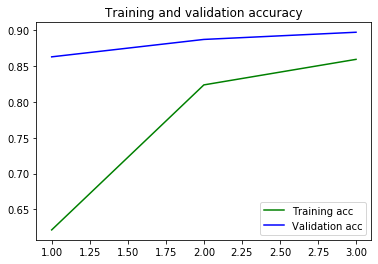

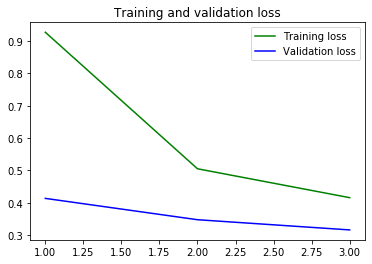

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
from keras.models import load_model

model_nn.save('ag_news_3epoch.h5')

In [37]:
model_nn = load_model('ag_news_3epoch.h5')

In [43]:
txt = ["The sale will proceed at $15.39/share with settlement expected on 2 April 2020"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model_nn.predict(padded)
labels = ['World', 'sport', 'business', 'scitech']
print(pred, labels[np.argmax(pred)])

[[0.04972949 0.00725997 0.53527945 0.40773115]] business
